In [7]:
import pandas as pd

df = pd.read_csv('../../data/processed/SalesRevenue_processed.csv')
#df = pd.read_csv('../../data/processed/SalesRevenueProcessed.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   IsPromotionApplied             2000 non-null   int64  
 1   ProductionCost                 2000 non-null   float64
 2   MarketingSpend                 2000 non-null   float64
 3   SeasonalDemandIndex            2000 non-null   float64
 4   CompetitorPrice                2000 non-null   float64
 5   CustomerRating                 2000 non-null   float64
 6   EconomicIndex                  2000 non-null   float64
 7   StoreCount                     2000 non-null   float64
 8   SalesRevenue                   2000 non-null   float64
 9   ProductCategory_Electronics    2000 non-null   int64  
 10  ProductCategory_Furniture      2000 non-null   int64  
 11  ProductCategory_Toys           2000 non-null   int64  
 12  Region_North                   2000 non-null   i

[16, 32, 16, 1]
Epoch 1/150, Train MSE: 0.321248, Validation MSE: 0.336309
Epoch 11/150, Train MSE: 0.207236, Validation MSE: 0.233559
Epoch 21/150, Train MSE: 0.188471, Validation MSE: 0.230335
Epoch 31/150, Train MSE: 0.180330, Validation MSE: 0.227673
Epoch 41/150, Train MSE: 0.174906, Validation MSE: 0.225317
Epoch 51/150, Train MSE: 0.171128, Validation MSE: 0.228570
Epoch 61/150, Train MSE: 0.166485, Validation MSE: 0.226835
Epoch 71/150, Train MSE: 0.163403, Validation MSE: 0.231746
Epoch 81/150, Train MSE: 0.160825, Validation MSE: 0.235037
Epoch 91/150, Train MSE: 0.158937, Validation MSE: 0.236165
Epoch 101/150, Train MSE: 0.155829, Validation MSE: 0.236745
Epoch 111/150, Train MSE: 0.154009, Validation MSE: 0.242527
Epoch 121/150, Train MSE: 0.153096, Validation MSE: 0.244872
Epoch 131/150, Train MSE: 0.151545, Validation MSE: 0.243846
Epoch 141/150, Train MSE: 0.150612, Validation MSE: 0.249146
Epoch 150/150, Train MSE: 0.148508, Validation MSE: 0.248993


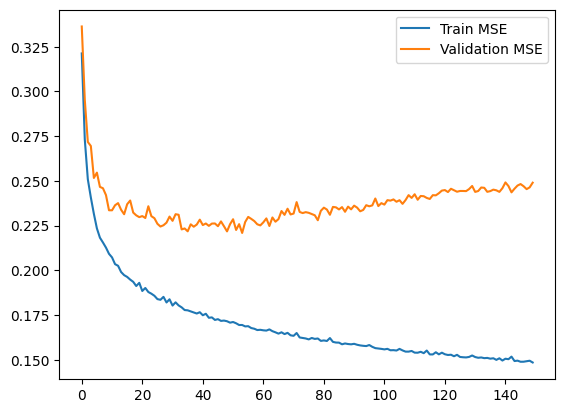

In [8]:
import sys
import os

# Añadir la carpeta src al path
sys.path.append(os.path.abspath("../../src"))

from NeuralNet import NeuralNet

X = df.drop(columns=['SalesRevenue'])
y = df['SalesRevenue']

layers = [16, 32, 16, 1]
epochs = 150
learning_rate = 0.001
momentum = 0.9
fact = "tanh"
validation_split = 0.2

nn = NeuralNet(layers, epochs, learning_rate, momentum, fact, validation_split)

# Entrenar el modelo
nn.fit(X, y)

train_loss, val_loss = nn.loss_epochs()

import matplotlib.pyplot as plt

plt.plot(train_loss, label="Train MSE")
plt.plot(val_loss, label="Validation MSE")
plt.legend()
plt.show()